In [108]:
# imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [95]:
# reading in data from a CSV
# data is from Yahoo Finance
jets_historical = pd.read_csv(
    Path("./jets (1).csv"),
    index_col="Date")

jets_hist = pd.DataFrame(jets_historical)
cols = [4]
jets_hist = jets_hist[jets_hist.columns[cols]]
jets_hist.index = pd.to_datetime(jets_hist.index)
jets_hist.head()

,Adj Close
Date,
2017-06-01,29.733128
2017-06-02,30.069046
2017-06-05,30.088240
2017-06-06,30.011457
2017-06-07,30.376162


<AxesSubplot:xlabel='Date'>

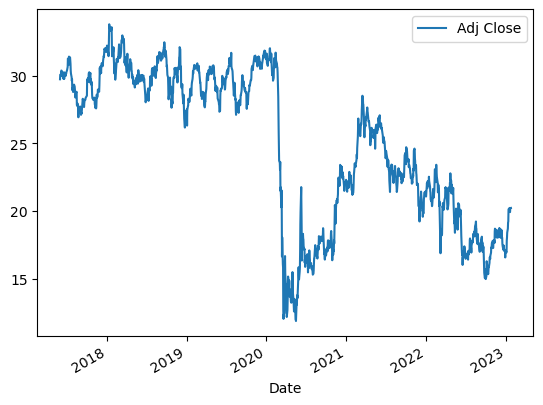

In [111]:
jets_hist.plot()

In [109]:
#reading in data from a CSV
#data is from macro trends
oil_hist = pd.read_csv(Path("./HistoricalData_1674177730446.csv"),index_col="date", parse_dates= True)
oil_hist.head()

,value
date,
2010-01-25,74.90
2010-01-26,74.67
2010-01-27,73.64
2010-01-28,73.62
2010-01-29,72.85


<AxesSubplot:xlabel='date'>

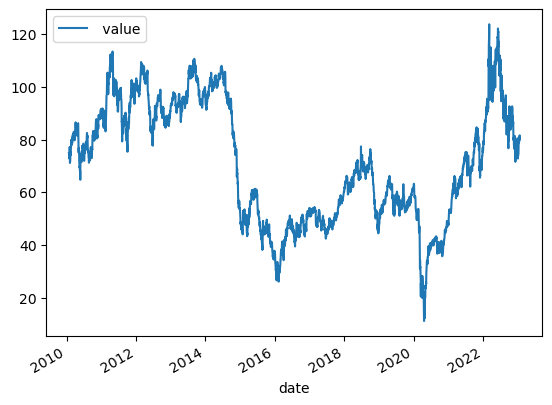

In [110]:
oil_hist.plot()

In [97]:
# reading in dollar strength data
USD_historical = pd.read_csv(
    Path("./dx-y.nyb.csv"),
    index_col="Date")

usd_hist = pd.DataFrame(USD_historical)
cols = [4]
usd_hist = usd_hist[usd_hist.columns[cols]]
usd_hist.index = pd.to_datetime(usd_hist.index)
usd_hist.head()

,Adj Close
Date,
2017-06-01,97.199997
2017-06-02,96.720001
2017-06-04,NaN
2017-06-05,96.800003
2017-06-06,96.639999


<AxesSubplot:xlabel='Date'>

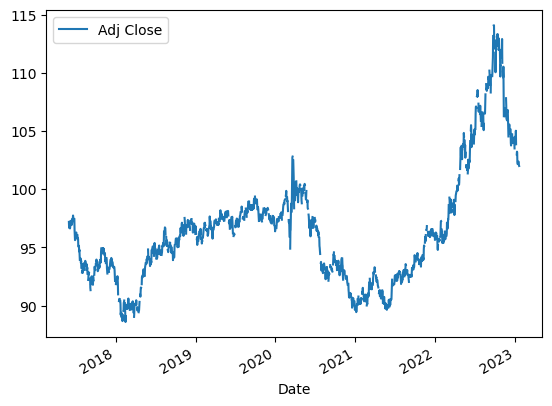

In [112]:
usd_hist.plot()

In [98]:
#combining macro and stock data
data_hist = pd.concat([jets_hist,oil_hist,usd_hist], axis='columns', join='inner').dropna()
data_hist.columns = ['Jets', 'Oil', 'USD']
data_hist

,Jets,Oil,USD
2017-06-01,29.733128,48.32,97.199997
2017-06-02,30.069046,47.68,96.720001
2017-06-05,30.088240,47.40,96.800003
2017-06-06,30.011457,48.13,96.639999
2017-06-07,30.376162,45.80,96.750000
...,...,...,...
2023-01-17,20.250000,80.18,102.389999
2023-01-18,19.969999,79.48,102.360001
2023-01-19,19.940001,80.58,102.059998
2023-01-20,20.240000,81.40,102.010002


<AxesSubplot:>

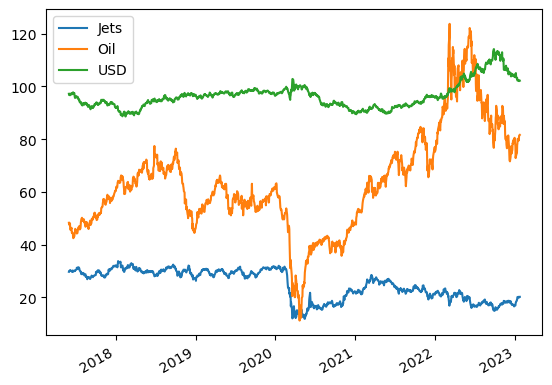

In [113]:
data_hist.plot()

In [99]:
#reading in sentiment data
sentiment_data = pd.read_csv(
    Path("./google_data.csv"),
    index_col="date")
sentiment_data.index = pd.to_datetime(sentiment_data.index)
sentiment_data.tail()

,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
date,,,,,,,,,,,,,,
2022-12-28,7,56,0,3,66,4,3,60,3,0,78,62,30,9
2022-12-29,7,56,0,3,66,4,3,60,3,0,78,62,30,9
2022-12-30,7,56,0,3,66,4,3,60,3,0,78,62,30,9
2022-12-31,7,56,0,3,66,4,3,60,3,0,78,62,30,9
2023-01-01,8,69,0,3,66,4,3,62,3,1,73,63,32,10


In [100]:
#combining all data sets
combined_data = pd.concat([data_hist,sentiment_data],axis = 1).dropna()
combined_data



,Jets,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
2017-06-01,29.733128,48.32,97.199997,17.0,62.0,0.0,3.0,94.0,6.0,3.0,68.0,2.0,1.0,94.0,82.0,49.0,12.0
2017-06-02,30.069046,47.68,96.720001,17.0,62.0,0.0,3.0,94.0,6.0,3.0,68.0,2.0,1.0,94.0,82.0,49.0,12.0
2017-06-05,30.088240,47.40,96.800003,17.0,62.0,0.0,3.0,94.0,6.0,3.0,68.0,2.0,1.0,94.0,82.0,49.0,12.0
2017-06-06,30.011457,48.13,96.639999,17.0,62.0,0.0,3.0,94.0,6.0,3.0,68.0,2.0,1.0,94.0,82.0,49.0,12.0
2017-06-07,30.376162,45.80,96.750000,17.0,62.0,0.0,3.0,94.0,6.0,3.0,68.0,2.0,1.0,94.0,82.0,49.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,17.230000,79.35,104.309998,7.0,56.0,0.0,3.0,66.0,4.0,3.0,60.0,3.0,0.0,78.0,62.0,30.0,9.0
2022-12-27,17.010000,79.87,104.180000,7.0,56.0,0.0,3.0,66.0,4.0,3.0,60.0,3.0,0.0,78.0,62.0,30.0,9.0
2022-12-28,16.600000,78.96,104.459999,7.0,56.0,0.0,3.0,66.0,4.0,3.0,60.0,3.0,0.0,78.0,62.0,30.0,9.0
2022-12-29,17.040001,78.71,103.839996,7.0,56.0,0.0,3.0,66.0,4.0,3.0,60.0,3.0,0.0,78.0,62.0,30.0,9.0


In [101]:
# using a standar scalar on the data
scaled_data = StandardScaler().fit_transform(combined_data)

In [102]:
combined_scaled_data = pd.DataFrame(
    scaled_data,
    columns=combined_data.columns
)

combined_scaled_data["Date"] = combined_data.index

combined_scaled_data = combined_scaled_data.set_index("Date")
combined_scaled_data

,Jets,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
Date,,,,,,,,,,,,,,,,,
2017-06-01,0.859663,-0.781356,0.164142,1.697257,0.138630,0.0,-0.782521,1.34990,1.788642,0.641258,1.134280,0.118646,0.313112,1.038083,1.093067,1.397435,1.214630
2017-06-02,0.919777,-0.814560,0.067009,1.697257,0.138630,0.0,-0.782521,1.34990,1.788642,0.641258,1.134280,0.118646,0.313112,1.038083,1.093067,1.397435,1.214630
2017-06-05,0.923212,-0.829087,0.083199,1.697257,0.138630,0.0,-0.782521,1.34990,1.788642,0.641258,1.134280,0.118646,0.313112,1.038083,1.093067,1.397435,1.214630
2017-06-06,0.909471,-0.791214,0.050820,1.697257,0.138630,0.0,-0.782521,1.34990,1.788642,0.641258,1.134280,0.118646,0.313112,1.038083,1.093067,1.397435,1.214630
2017-06-07,0.974736,-0.912097,0.073080,1.697257,0.138630,0.0,-0.782521,1.34990,1.788642,0.641258,1.134280,0.118646,0.313112,1.038083,1.093067,1.397435,1.214630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-1.377802,0.828521,1.602934,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.296690,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-27,-1.417171,0.855499,1.576627,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.296690,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-28,-1.490542,0.808287,1.633288,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.296690,-3.193744,0.409537,-0.064755,-1.311285,-0.574096


In [103]:
#writing it to a CSV
data_path = Path("./combined_data_real_time.csv")
combined_scaled_data.to_csv(data_path)


In [104]:
#shifting the data. I.E data used to predict the current value will be 5 days old
Shifted_combined_data =  combined_scaled_data.copy()
Shifted_combined_data = Shifted_combined_data.shift(periods=5)
Shifted_combined_data.rename(columns={"Jets": "Jets_Shifted"}, inplace= True)
Shifted_combined_data.tail(10)

,Jets_Shifted,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
Date,,,,,,,,,,,,,,,,,
2022-12-16,-1.220324,0.425922,1.704114,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-19,-1.132637,0.514639,1.768870,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-20,-1.227482,0.623071,1.536155,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-21,-1.229272,0.721126,1.493658,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-22,-1.311590,0.673914,1.653524,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-23,-1.338432,0.576896,1.681854,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-27,-1.386750,0.637598,1.685902,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-28,-1.374223,0.655756,1.534131,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-29,-1.333064,0.780271,1.572581,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096


In [105]:
#combining it with the current stock price
Shifted_combined_data = pd.concat([Shifted_combined_data,combined_scaled_data["Jets"] ], axis= 1)


In [106]:
Shifted_combined_data.tail(10)

,Jets_Shifted,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road,Jets
Date,,,,,,,,,,,,,,,,,,
2022-12-16,-1.220324,0.425922,1.704114,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.338432
2022-12-19,-1.132637,0.514639,1.768870,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.386750
2022-12-20,-1.227482,0.623071,1.536155,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.374223
2022-12-21,-1.229272,0.721126,1.493658,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.333064
2022-12-22,-1.311590,0.673914,1.653524,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.399276
2022-12-23,-1.338432,0.576896,1.681854,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.377802
2022-12-27,-1.386750,0.637598,1.685902,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.417171
2022-12-28,-1.374223,0.655756,1.534131,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.490542
2022-12-29,-1.333064,0.780271,1.572581,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.411803


In [107]:
#writing the dataframe to a CSV
data_path = Path("./combined_data_shifted_time.csv")
Shifted_combined_data.to_csv(data_path)
